In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [70]:
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [3]:
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [71]:
df['year']=pd.DatetimeIndex(df['Date']).year

In [72]:
df['month_day'] = pd.DatetimeIndex(df['Date']).strftime('%m-%d')

In [73]:
df = df[df['month_day']!='02-29']

In [100]:
df_high = df[(df['year']>=2005) & (df['year']<=2014) & (df['Element']=='TMAX')]

In [75]:
df_low = df[(df['year']>=2005) & (df['year']<=2014) & (df['Element']=='TMIN')]

In [101]:
df_high = df_high.groupby('month_day')['Data_Value'].max()

In [78]:
df_low = df_low.groupby('month_day')['Data_Value'].min()

In [92]:
date_index =np.arange('2015-01-01','2016-01-01',dtype='datetime64[D]')

In [130]:
df.head()

,ID,Date,Element,Data_Value,year,month_day
0,USW00094889,2014-11-12,TMAX,22,2014,11-12
1,USC00208972,2009-04-29,TMIN,56,2009,04-29
2,USC00200032,2008-05-26,TMAX,278,2008,05-26
3,USC00205563,2005-11-11,TMAX,139,2005,11-11
4,USC00200230,2014-02-27,TMAX,-106,2014,02-27


In [131]:
df =df.merge(df_high.reset_index(drop=False).rename(columns={'Data_Value':'max_temp'}),on='month_day',how='left')

In [133]:
df = df.merge(df_low.reset_index(drop=False).rename(columns={'Data_Value':'min_temp'}),on='month_day',how='left')

In [135]:
break_high = df[(df['year']==2015) & (df['Data_Value']>df['max_temp'])]

In [136]:
break_low = df[(df['year']==2015) & (df['Data_Value']<df['min_temp'])]

In [153]:
df.head()

,ID,Date,Element,Data_Value,year,month_day,max_temp,min_temp
0,USW00094889,2014-11-12,TMAX,22,2014,11-12,211,-94
1,USC00208972,2009-04-29,TMIN,56,2009,04-29,272,-50
2,USC00200032,2008-05-26,TMAX,278,2008,05-26,333,-10
3,USC00205563,2005-11-11,TMAX,139,2005,11-11,222,-77
4,USC00200230,2014-02-27,TMAX,-106,2014,02-27,122,-238


<IPython.core.display.Javascript object>


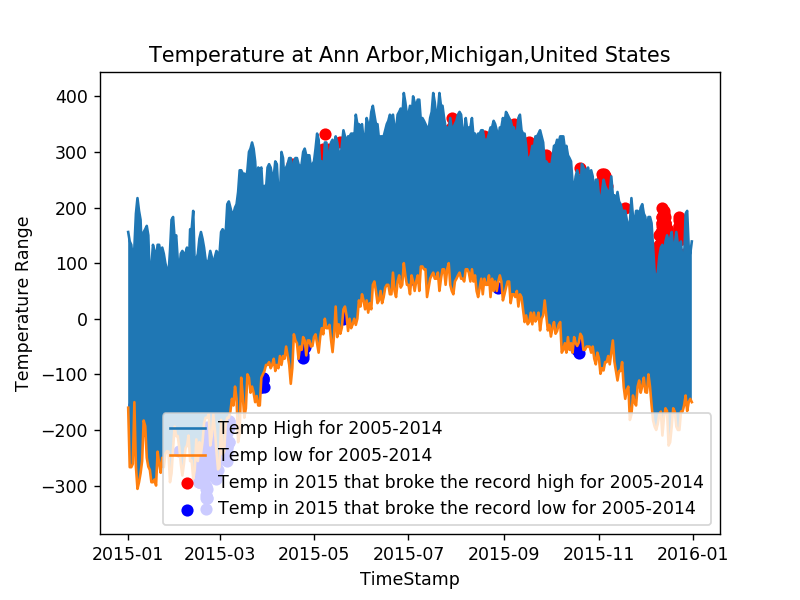

In [152]:
plt.figure()
plt.plot(date_index,df_high)
plt.plot(date_index,df_low)
plt.scatter(break_high['Date'].values,break_high['Data_Value'].values,color='r')
plt.scatter(break_low['Date'].values,break_low['Data_Value'].values,color='b')
plt.xlabel('TimeStamp')
plt.ylabel('Temperature Range')
plt.legend(['Temp High for 2005-2014','Temp low for 2005-2014',
            'Temp in 2015 that broke the record high for 2005-2014',
            'Temp in 2015 that broke the record low for 2005-2014'])
plt.title('Temperature at Ann Arbor,Michigan,United States')
plt.gca().fill_between(date_index,df_high,df_low)

In [154]:
plt.savefig('assig 2.png')